### gather data

In [2]:
# library imports
import requests
import tweepy
import numpy as np
import pandas as pd
import csv
import os
import json
import matplotlib.pyplot as plt
import re

%matplotlib inline

#### download_tsv_file

In [193]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response_tweet_image = requests.get(url)

response_tweet_image

<Response [200]>

In [194]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response_tweet_image.content)

In [59]:
os.listdir()

['twitter-archive-enhanced.csv',
 'tweet_json.txt',
 'tweet_image_predictions.tsv',
 '.ipynb_checkpoints',
 'wrangle_act.ipynb']

#### download the tweet file

##### set up authorization

In [60]:
consumer_key = 't9OSPsLs0F0YcxvBpu4ekmmsp'
consumer_secret = 'thZg686OZdVq1RX0Yq545n0LMz05oEtlAdOKwZi4qQX7hka69s'
access_token = '2592013134-TMhnLQqv2rjQpXHf3yrcycmitRTeEosa63AiM6d'
access_secret = 'ykLcpdFKCTcLArl4CALJ3eyxky4960M89thh1uJG5Y6th'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify= True)

In [61]:
#test

tweet = api.get_status('892420643555336193')._json
tweet['retweet_count']

8665

In [62]:
tweet['favorite_count']

39035

In [63]:
tweet['in_reply_to_status_id']

In [64]:
tweet['created_at']

'Tue Aug 01 16:23:56 +0000 2017'

In [9]:
tweet_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
tweet_id = tweet_archive_enhanced['tweet_id']

In [71]:
#test


df_list = []

error = []

from timeit import default_timer as timer


start = timer()
with open('tweet_json.txt', 'w') as file:

    for i in tweet_id:
        try:
            tweet = api.get_status(i)._json
            tweet_json = json.dumps(tweet)
            file.write(tweet_json + '\n')
        
        except:
            print(str(i) + ' '+ ' error')
            error.append(i)
        
end = timer()
print(end - start) 
print('complete')

888202515573088257  error
873697596434513921  error
869988702071779329  error
866816280283807744  error
861769973181624320  error
845459076796616705  error
842892208864923648  error
837012587749474308  error
827228250799742977  error
802247111496568832  error
775096608509886464  error
Rate limit reached. Sleeping for: 729
1182.541310607
complete


b'Skipping line 14: expected 119 fields, saw 141\nSkipping line 19: expected 119 fields, saw 185\nSkipping line 22: expected 119 fields, saw 131\nSkipping line 23: expected 119 fields, saw 141\nSkipping line 24: expected 119 fields, saw 134\nSkipping line 26: expected 119 fields, saw 141\nSkipping line 32: expected 119 fields, saw 255\nSkipping line 35: expected 119 fields, saw 159\nSkipping line 36: expected 119 fields, saw 299\nSkipping line 38: expected 119 fields, saw 120\nSkipping line 42: expected 119 fields, saw 222\nSkipping line 45: expected 119 fields, saw 142\nSkipping line 47: expected 119 fields, saw 142\nSkipping line 48: expected 119 fields, saw 141\nSkipping line 51: expected 119 fields, saw 163\nSkipping line 60: expected 119 fields, saw 185\nSkipping line 61: expected 119 fields, saw 141\nSkipping line 63: expected 119 fields, saw 163\nSkipping line 66: expected 119 fields, saw 131\nSkipping line 68: expected 119 fields, saw 219\nSkipping line 72: expected 119 fields,

In [3]:
tweet_json = pd.read_json('tweet_json.txt',lines= True)

In [4]:
tweet_json.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39033,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8665,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,33431,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6366,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,25198,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4227,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42402,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8771,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,40553,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9549,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [20]:
tweet_json.iloc[0]

contributors                                                                   NaN
coordinates                                                                    NaN
created_at                                                     2017-08-01 16:23:56
entities                         {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities                {'media': [{'id': 892420639486877696, 'id_str'...
favorite_count                                                               39033
favorited                                                                    False
geo                                                                            NaN
id                                                              892420643555336193
id_str                                                          892420643555336192
in_reply_to_screen_name                                                       None
in_reply_to_status_id                                                          NaN
in_r

* previous I found the id is not equal to id_str. it turns out i am wrong.
#### You’ll find this to be an observational error in that if you use an environment that in any way tries to consume the JSON, it munges very large integers. See the FAQ question below for more information:

###### load_tweet_account

### access data

In [3]:
tweet_json = pd.read_json('tweet_json.txt',lines= True)
tweet_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
tweet_image_predictions =  pd.read_csv('image_predictions.tsv',sep = "\t")

In [4]:
tweet_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
tweet_archive_enhanced[tweet_archive_enhanced['tweet_id'] == 892420643555336193]['expanded_urls']

0    https://twitter.com/dog_rates/status/892420643...
Name: expanded_urls, dtype: object

#### tweet_archive_enhanced
**tweet_id**:The integer representation of the unique identifier for this Tweet.  
**in_reply_to_status_id** : If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.   
**in_reply_to_user_id**:If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID  
**timestamp**:UTC time when this Tweet was created   
**source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.  
**text**: The actual UTF-8 text of the status update. See twitter-text for details on what characters are currently considered valid  
**retweeted_status_id**: The integer representation of the original Tweet’s ID for this reTweet.  
**retweeted_status_user_id**: If the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID.
**retweeted_status_timestamp**:If the represented Tweet is a retweet, UTC time when the original Tweet was created   
**expanded_urls**:Expanded version of display_url   
**rating_numerator**: rating numerator  
**rating_denominator**: rating denominator
**name**: dog name

In [6]:
tweet_archive_enhanced[tweet_archive_enhanced['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [7]:
tweet_json.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39033,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8665,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,33431,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6366,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,25198,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4227,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42402,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8771,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,40553,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9549,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
geo                              0 non-null float64
id                               2345 non-null int64
id_str                           2345 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2345 non-null bool
lang                             2345 no

In [9]:
tweet_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### tweet_image_predictions
**tweet_id**:The integer representation of the unique identifier for this Tweet.  
**jpg_url** : dog picture  
**image_num**: the picture number in that tweet    
**p1**:the algorithm's #1 prediction for the image in the tweet    
**p1_conf**: how confident the algorithm is in its #1 prediction   
**p1_dog**: whether or not the #1 prediction is a breed of dog   
**p2**: the algorithm's second most likely prediction.  
**p2_conf**: how confident the algorithm is in its #2 prediction  
**p2_dog**:whether or not the #3 prediction is a breed of dog   
**p3**: the algorithm's third most likely prediction.  
**p3_conf**: how confident the algorithm is in its #3 prediction  
**p3_dog**:whether or not the #3 prediction is a breed of dog   

In [10]:
tweet_archive_enhanced.loc[0,'expanded_urls']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

### Quality

*tweet_archive_enhance_table* 


1. tweet_archive_enhanced talbe expanded_urls is not complete. only 2297
2. we do not need retweet or reply
3. tweet_archive_enhanced talbe tweet_id is int64, should be object
4.  timestamp should be datetime data type
5. 181 tweets is retweets, we need to remove that. 
6. expanded_urls information is not complete to find original query<br>
7. text have some website location address, which does not belong to text.need to remove
8. rating are not all correct. need to correct that.
9. drop unused column like  in_reply_to_status_id,in_reply_to_status_id,retweeted_status_idretweeted_status_user_id,retweeted_status_timestamp 
10. index 200. the dog have 2 stage information: which is not ture. need to be cleaned<br>
11. a lot of dog name is wrong. need to be cleaned

*tweet_json*

12.tweet_json. id have wrong data and need to add into main_file for favoriate and retweet information

*tweet_image_predictions*

13.drop some of information I will not use. like p2 and p3 series

### Tidiness

*tweet_archive_enhanced*  

14.doggo,floofer,pupper,puppo is not value. it is value of dog_type <br>
15.tweet_archive_enhanced should add those add  retweet count and favorite ("like") count together from tweet_json

*tweet_image_predictions*<br /> 

16.p1/p2/p3 is value not variable. should be under forecast value should be forecast_breed<br />
17.p1_dog/p1_dog/p1_dog/p1_dog should be "match_breed_of_dog<br />
18.join p1 forecast information with main databaset

## Clean

### define

1.tweet_archive_enhanced talbe expanded_urls is not complete. only 2297. Add those missing expanded_urls into the dataframe

### code

In [11]:
tweet_archive_enhanced_clean = tweet_archive_enhanced

In [12]:
tweet_archive_enhanced_clean['expanded_urls'] = "https://twitter.com/dog_rates/status/" + tweet_archive_enhanced_clean['tweet_id'].astype(str)

### test

In [13]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
tweet_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### define

2.we do not need retweet or reply. deleted all records which 'retweeted_status_id' is not null<br />   or    'in_reply_to_status_id'                                                       

### code

In [15]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['retweeted_status_id'].isnull()]
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['in_reply_to_status_id'].isnull()]

### test

In [16]:
tweet_archive_enhanced_clean['retweeted_status_id'].value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [17]:
tweet_archive_enhanced_clean['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

### define
3.tweet_archive_enhanced talbe tweet_id is int64, should be object<br>
4.timestamp should be datetime datatyep

### code

In [18]:
tweet_archive_enhanced_clean['tweet_id'] =tweet_archive_enhanced_clean['tweet_id'].astype(str)


In [19]:
tweet_archive_enhanced_clean['timestamp'] = pd.to_datetime(tweet_archive_enhanced_clean['timestamp'])


### test

In [20]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2097 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), floa

In [21]:
tweet_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### define
7.text have some website location address, which does not belong to text.need to remove

### code

In [22]:
tweet_archive_enhanced_clean['text'] = tweet_archive_enhanced_clean['text'].str.replace('\shttp\S+','')

### test

In [23]:
tweet_archive_enhanced_clean.loc[277,'text']

'You have been visited by the magical sugar jar puggo. He has granted you three boops. 13/10 would use immediately'

In [24]:
tweet_archive_enhanced_clean.iloc[221]

tweet_id                                                     840370681858686976
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-03-11 01:15:58
source                        <a href="http://twitter.com/download/iphone" r...
text                          You have been visited by the magical sugar jar...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/840370681...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

### define

8.rating are not all correct. need to correct that.remove the record which denominator is not 10

In [25]:
tweet_archive_enhanced_clean['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10'

In [26]:
tweet_archive_enhanced_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [27]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['rating_denominator']==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [28]:
tweet_archive_enhanced_clean.loc[2338,'text']

"Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10"

In [29]:
tweet_archive_enhanced_clean.loc[1202,'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10'

### code

In [30]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['text'].str.extract('(([0-9]*[.\\]*[0-9]+)\/(10))',expand = True)[1]=='...10']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None
1009,747512671126323200,NaN,NaN,2016-06-27 19:31:23,"<a href=""http://twitter.com/download/iphone"" r...",Guys pls stop sending actual sharks. It's too ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747512671...,10,10,None,None,None,None,None
1071,740214038584557568,NaN,NaN,2016-06-07 16:09:13,"<a href=""http://twitter.com/download/iphone"" r...",This is getting incredibly frustrating. This i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/740214038...,10,10,getting,None,None,None,None
1077,739544079319588864,NaN,NaN,2016-06-05 19:47:03,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
1098,736010884653420544,NaN,NaN,2016-05-27 01:47:23,"<a href=""http://twitter.com/download/iphone"" r...",Right after you graduate vs when you remember ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736010884...,10,10,None,None,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None
1627,684594889858887680,NaN,NaN,2016-01-06 04:38:35,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684594889...,10,10,None,None,None,None,None


In [31]:
tweet_archive_enhanced_clean.loc[1627,'text']

'"FOR THE LAST TIME I DON\'T WANNA PLAY TWISTER ALL THE SPOTS ARE GREY DAMN IT CINDY" ...10/10'

In [32]:
tweet_archive_enhanced_clean['rating_numerator'] = tweet_archive_enhanced_clean['text'].str.extract('([0-9]+[.]*[0-9]*)\/(10)',expand = True)[0].astype('float')

In [33]:
tweet_archive_enhanced_clean['rating_denominator'] = tweet_archive_enhanced_clean['text'].str.extract('([0-9]+[.]*[0-9]*)\/(10)',expand = True)[1].astype('float')


In [34]:
tweet_archive_enhanced_clean['rating_denominator'].value_counts()

10.0    2085
Name: rating_denominator, dtype: int64

In [35]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['rating_denominator'].notnull()]

In [36]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2085 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2085 non-null datetime64[ns]
source                        2085 non-null object
text                          2085 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2085 non-null object
rating_numerator              2085 non-null float64
rating_denominator            2085 non-null float64
name                          2085 non-null object
doggo                         2085 non-null object
floofer                       2085 non-null object
pupper                        2085 non-null object
puppo                         2085 non-null object
dtypes: datetime64[ns](1), 

In [37]:
tweet_archive_enhanced_clean['rating_numerator'].sum()

24301.779999999999

In [38]:
tweet_archive_enhanced_clean['rating_denominator'].sum()

20850.0

### test 

In [39]:
tweet_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


### define

9.drop unused column like in_reply_to_status_id,in_reply_to_status_id,<br>
retweeted_status_idretweeted_status_user_id,retweeted_status_timestamp 

### code


In [40]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                                  'retweeted_status_id','retweeted_status_user_id',
                                                                  'retweeted_status_timestamp'],axis =1)

### test

In [41]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2085 non-null object
timestamp             2085 non-null datetime64[ns]
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2085 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2085 non-null float64
name                  2085 non-null object
doggo                 2085 non-null object
floofer               2085 non-null object
pupper                2085 non-null object
puppo                 2085 non-null object
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 211.8+ KB


define

14.doggo,floofer,pupper,puppo is not value. it is value of dog_type <br>
 value of dog stage should not be multiple columns, covert to long dataframe <br>
index 200 dog have 2 stage name will be cleaned too

### code

In [42]:
tweet_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None


In [43]:
tweet_archive_enhanced_clean['doggo'].value_counts()

None     2002
doggo      83
Name: doggo, dtype: int64

In [44]:
tweet_archive_enhanced_clean['floofer'].value_counts()

None       2075
floofer      10
Name: floofer, dtype: int64

In [45]:
tweet_archive_enhanced[tweet_archive_enhanced['floofer']=='floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746542875...,11,10,None,None,floofer,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689993469...,12,10,None,None,floofer,None,None
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None


In [46]:
def dog_stage(row):
    if row['doggo'] == 'doggo':
        return 'doggo'
    elif row['floofer'] == 'floofer':
        return 'floofer'
    elif row['pupper'] == 'pupper':
        return 'pupper'
    elif row['puppo'] =='puppo':
        return 'puppo'
    else:
        return 'None'

In [47]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean.assign(dog_stage=tweet_archive_enhanced_clean.apply(dog_stage,axis=1))

In [48]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2085 non-null object
timestamp             2085 non-null datetime64[ns]
source                2085 non-null object
text                  2085 non-null object
expanded_urls         2085 non-null object
rating_numerator      2085 non-null float64
rating_denominator    2085 non-null float64
name                  2085 non-null object
doggo                 2085 non-null object
floofer               2085 non-null object
pupper                2085 non-null object
puppo                 2085 non-null object
dog_stage             2085 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 228.0+ KB


In [49]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean.drop(['doggo','floofer','pupper','puppo'], axis =1)

In [50]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['dog_stage']=='floofer']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
46,883360690899218434,2017-07-07 16:22:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,floofer
582,800388270626521089,2016-11-20 17:20:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12.0,10.0,Doc,floofer
774,776218204058357768,2016-09-15 00:36:55,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13.0,10.0,None,floofer
984,749317047558017024,2016-07-02 19:01:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,https://twitter.com/dog_rates/status/749317047...,12.0,10.0,Blu,floofer
1022,746542875601690625,2016-06-25 03:17:46,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,https://twitter.com/dog_rates/status/746542875...,11.0,10.0,None,floofer
1091,737445876994609152,2016-05-31 00:49:32,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,https://twitter.com/dog_rates/status/737445876...,13.0,10.0,None,floofer
1110,733822306246479872,2016-05-21 00:50:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10.0,10.0,Moose,floofer
1534,689993469801164801,2016-01-21 02:10:37,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,https://twitter.com/dog_rates/status/689993469...,12.0,10.0,None,floofer
1614,685307451701334016,2016-01-08 03:50:03,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,11.0,10.0,Petrick,floofer


In [51]:
tweet_archive_enhanced_clean.loc[200]

tweet_id                                             854010172552949760
timestamp                                           2017-04-17 16:34:26
source                <a href="http://twitter.com/download/iphone" r...
text                  At first I thought this was a shy doggo, but i...
expanded_urls         https://twitter.com/dog_rates/status/854010172...
rating_numerator                                                     11
rating_denominator                                                   10
name                                                               None
dog_stage                                                         doggo
Name: 200, dtype: object

In [52]:
tweet_archive_enhanced_clean.loc[200,'dog_stage']='floofer'

### define 
11.a lot of dog name is wrong. need to be cleaned

In [53]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['name']== 'a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
56,881536004380872706,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10.0,a,pupper
649,792913359805018113,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13.0,10.0,a,None
801,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10.0,10.0,a,None
1002,747885874273214464,2016-06-28 20:14:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8.0,10.0,a,None
1004,747816857231626240,2016-06-28 15:40:07,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4.0,10.0,a,None
1017,746872823977771008,2016-06-26 01:08:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11.0,10.0,a,None
1049,743222593470234624,2016-06-15 23:24:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12.0,10.0,a,pupper
1193,717537687239008257,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11.0,10.0,a,None
1207,715733265223708672,2016-04-01 02:51:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10.0,10.0,a,None
1340,704859558691414016,2016-03-02 02:43:09,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.0,10.0,a,pupper


### code 

In [54]:
tweet_archive_enhanced_clean['name'].replace(to_replace =['a','an','the'],value = 'None',inplace = True)

In [55]:
tweet_archive_enhanced_clean['name'].value_counts()

None              662
Lucy               11
Charlie            11
Oliver             10
Cooper             10
Penny               9
Tucker              9
Lola                8
Sadie               8
Winston             8
Toby                7
Daisy               7
Bo                  6
Stanley             6
Oscar               6
Bailey              6
Koda                6
Jax                 6
Bella               6
Bentley             5
Scout               5
Rusty               5
Dave                5
Buddy               5
Leo                 5
Louis               5
Milo                5
Chester             5
Gus                 4
Archie              4
                 ... 
Kobe                1
Jeffrie             1
Michelangelope      1
Bruiser             1
Obi                 1
Lucky               1
Swagger             1
Pumpkin             1
Dug                 1
Major               1
Boots               1
Comet               1
Bodie               1
Nigel               1
Chelsea   

### define 

12.tweet_json.<br>
id have wrong data and need to add into main_file for favoriate and retweet information

### code 

In [56]:
tweet_json_clean = tweet_json

In [57]:
tweet_json_clean['id'] = tweet_json_clean['id'].astype('str')

In [58]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2345 non-null datetime64[ns]
entities                         2345 non-null object
extended_entities                1824 non-null object
favorite_count                   2345 non-null int64
favorited                        2345 non-null bool
geo                              0 non-null float64
id                               2345 non-null object
id_str                           2345 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2345 non-null bool
lang                             2345 n

In [59]:
tweet_archive_enhanced_clean =  pd.merge(tweet_archive_enhanced_clean,tweet_json[['retweet_count','favorite_count','id']], how ='left', left_on ='tweet_id',right_on ='id')

In [60]:
tweet_archive_enhanced_clean = tweet_archive_enhanced_clean.drop('id',axis =1)

### test

In [61]:
tweet_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,8665,39033
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,6366,33431
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,4227,25198
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,8771,42402
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,9549,40553


#### clean tweet_image_prediction_clean_data 

16.p1/p2/p3 is value not variable. should be under forecast value should be forecast_breed<br />
17.p1_dog/p1_dog/p1_dog/p1_dog should be "match_breed_of_dog<br />
18.join p1 forecast information with main databaset


change the tweet_id datatype to object

In [62]:
tweet_image_predictions_clean = tweet_image_predictions

In [63]:
tweet_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


####  define

'tweet_id' in tweet_image_predictions_clean is not string

In [64]:
tweet_image_predictions_clean['tweet_id'] = tweet_image_predictions_clean['tweet_id'].astype('str')

In [65]:
tweet_image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [66]:
tweet_archive_enhanced_clean = pd.merge(tweet_archive_enhanced_clean,tweet_image_predictions_clean[['tweet_id','p1','p1_conf','p1_dog']], how ='inner', left_on ='tweet_id',right_on ='tweet_id')

### test 

In [67]:
tweet_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 1958
Data columns (total 14 columns):
tweet_id              1959 non-null object
timestamp             1959 non-null datetime64[ns]
source                1959 non-null object
text                  1959 non-null object
expanded_urls         1959 non-null object
rating_numerator      1959 non-null float64
rating_denominator    1959 non-null float64
name                  1959 non-null object
dog_stage             1959 non-null object
retweet_count         1959 non-null int64
favorite_count        1959 non-null int64
p1                    1959 non-null object
p1_conf               1959 non-null float64
p1_dog                1959 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 216.2+ KB


## insights

 most common dog name in werate dogs

In [78]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['name']!='None']['name'].value_counts().head(10)

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Lola        7
Name: name, dtype: int64

Charlie is the winner

which dog does weratedog have most favorite?

In [69]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['favorite_count']==tweet_archive_enhanced_clean['favorite_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
306,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,49562,144129,Lakeland_terrier,0.196015,True


which dog does weratedog have most retweet?

In [70]:
tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['retweet_count']==tweet_archive_enhanced_clean['retweet_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,p1,p1_conf,p1_dog
766,744234799360020481,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,77986,129079,Labrador_retriever,0.825333,True


what is p1 method forecast correct rate?

In [71]:
tweet_archive_enhanced_clean['p1_dog'].value_counts()[True]/tweet_archive_enhanced_clean['p1_dog'].count()

0.74170495150587035

### Visulazation 

In [72]:
grouped = tweet_archive_enhanced_clean[tweet_archive_enhanced_clean['dog_stage']!='None'].groupby(['dog_stage'])['favorite_count']

Text(0,0.5,'total likes')

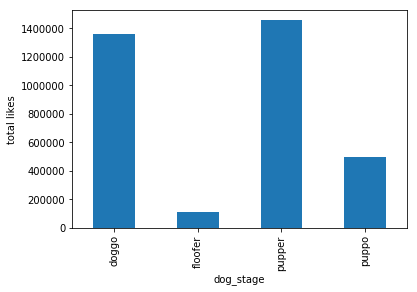

In [80]:
ax = grouped.sum().plot(kind = 'bar')
ax.set_ylabel('total likes')

### export 

In [74]:
tweet_archive_enhanced_clean.to_csv('twitter_archive_master.csv',sep =',',encoding = 'utf-8',index= False)